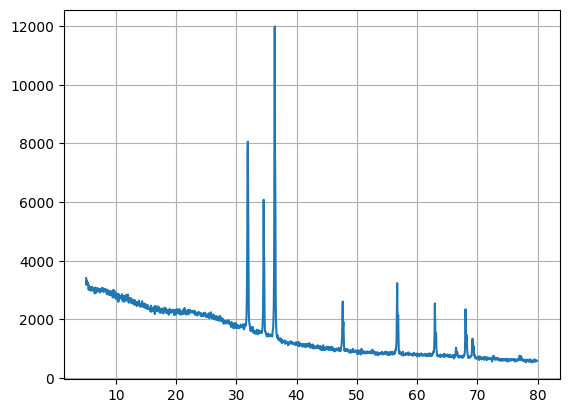

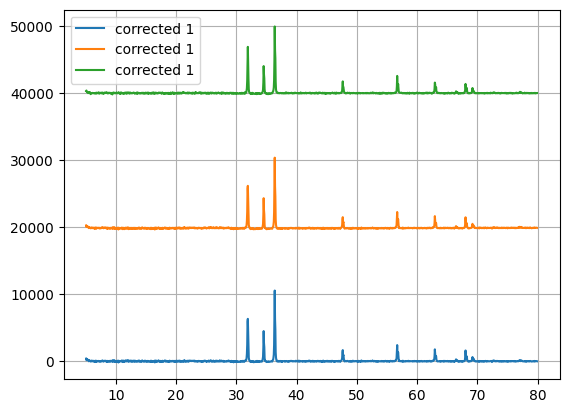

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_1 = pd.read_csv("7059.csv", skiprows=29, header=None, sep=',' , names=['Angle', 'Intensity'])
df_2 = pd.read_csv("7060.csv", skiprows=29, header=None, sep=',' , names=['Angle', 'Intensity'])
df_3 = pd.read_csv("7061.csv", skiprows=29, header=None, sep=',' , names=['Angle', 'Intensity'])


angle = df_1.iloc[:-1,0].values
I_1 = df_1.iloc[:-1,1].values
I_2 = df_2.iloc[:-1,1].values
I_3 = df_3.iloc[:-1,1].values


# for i , dif in enumerate(np.diff(I_1)):
#     if dif < 300:
#         I_1[i] = I_1[i] -  (I_1[i] + I_1[i+1])/2
        
    


plt.plot(angle, I_1)
plt.grid()
plt.show()



window = 100  # probar 101..2000 según densidad de datos
baseline = pd.Series(I_1).rolling(window, center=True, min_periods=1).median().values
I_corr1 = I_1 - baseline

#plt.plot(angle, I_1, label='original')
#plt.plot(angle, baseline, label='baseline (rolling median)', linewidth=2)
plt.plot(angle, I_corr1, label='corrected 1')

baseline2 = pd.Series(I_2).rolling(window, center=True, min_periods=1).median().values
I_corr2 = I_1 - baseline2

#plt.plot(angle, I_2, label='original')
#plt.plot(angle, baseline2, label='baseline (rolling median)', linewidth=2)
plt.plot(angle, I_corr2+20000, label='corrected 1')

baseline3 = pd.Series(I_3).rolling(window, center=True, min_periods=1).median().values
I_corr3 = I_3 - baseline3

#plt.plot(angle, I_3, label='original')
#plt.plot(angle, baseline3, label='baseline (rolling median)', linewidth=2)
plt.plot(angle, I_corr3+40000, label='corrected 1')


plt.legend(); plt.grid(); plt.show()